# To extract Twitter's tweets

This script extracts all the tweets with hashtag #covid-19 related to the day before today (yesterday) and saves them into a .csv file.
We use the `tweepy` library, which can be installed with the command `pip install tweepy`. 


*   To get Twitter consumer key, consumer sceret, access token and acess sceret- you have to reguster on [Twitter developer web portal](https://developer.twitter.com/)
*   After that go to dash board page ( see below image)
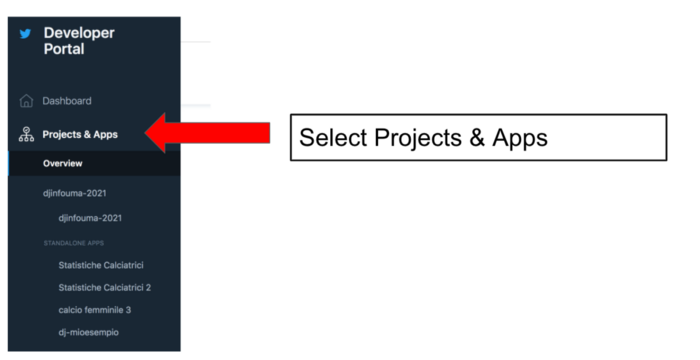
* Then, create a new project if you don't have project space (see screenshot)
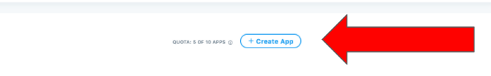


In [1]:
!pip install tweepy
import sys
import csv
import tweepy
import datetime

In [2]:
TWITTER_CONSUMER_KEY = 'vLcxeGYqPTm2De02u5Fa0c2Zs'
TWITTER_CONSUMER_SECRET = 'htu890Ysc8RCdN5eMkh25P6qDehVCbpAh0zNIKH8M55AK5RHqo'
TWITTER_ACCESS_TOKEN = '108051742-qVpGsVGEpCTf7B5xvbNs5jYHuHKaAwlpmqQQVjgq'
TWITTER_ACCESS_TOKEN_SECRET = 'goRE81O2jfuvtCGWWjspF7Fsibk3VUi2qApbJ3nZCb4l5'

We setup the connection to our Twitter App by using the `OAuthHandler()` class and its `access_token()` function. Then we call the Twitter API through the `API()` function.

In [4]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

Now we setup dates. We need to setup today and yesterday.

In [5]:
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)
today, yesterday

(datetime.date(2022, 1, 20), datetime.date(2022, 1, 19))

We search for tweets on Twitter by using the `Cursor()` function. 
We pass the `api.search` parameter to the cursor, as well as the query string, which is specified through the `q` parameter of the cursor.
The query string can receive many parameters, such as the following (not mandatory) ones:
* `from:` - to specify a specific Twitter user profile
* `since:` - to specify the beginning date of search
* `until:` - to specify the ending date of search
The cursor can also receive other parameters, such as the language and the `tweet_mode`. If `tweet_mode='extended'`, all the text of the tweet is returned, otherwise only the first 140 characters.

In [10]:
tweets_list = tweepy.Cursor(api.search, q="#Covid-19 since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='it').items()


In [9]:
tweets_list = tweepy.Cursor(api.search, q="from: elonmusk",tweet_mode='extended', lang='en').items()



Optionally, we can extract tweets from a given places, by specifying in the query string one of the following keywords, followed by `:`: 
* `place` - the place name or the place ID
* `place_country` - the country code. See [here](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) to see the country code
* `point_radius` - the circular geographic area within which to search for
* `bounding_box` - the 4 sided geographic area, within which to search for.

For more details, you can read the full [Twitter Documentation](https://developer.twitter.com/en/docs/tutorials/filtering-tweets-by-location).

Here 

In [12]:
place = 'Italy'
tweets_list = tweepy.Cursor(api.search, q="place: " + place,tweet_mode='extended', lang='it').items()

Now we loop across the `tweets_list`, and, for each tweet, we extract the text, the creation date, the number of retweets and the favourite count. We store every tweet into a list, called `output`.

In [13]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

🏖 Spiaggia di Scalea

📍 Spiaggia di Scalea, 87029 Scalea, Province of Cosenza, Italy

🗺 https://t.co/vBuPn7sCgS https://t.co/h0GlveTXEn
RT @random_places: #42903
71020 Panni, Province of Foggia, Italy
map: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS
#42903
71020 Panni, Province of Foggia, Italy
map: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS
RT @_restaurant_bot: Panificio Grano D'oro; Via Fratelli Bellanca, 14, 92019 Sciacca AG, Italy https://t.co/yyPBU9ekAA https://t.co/OA7NK6P…
Panificio Grano D'oro; Via Fratelli Bellanca, 14, 92019 Sciacca AG, Italy https://t.co/yyPBU9ekAA https://t.co/OA7NK6Pu68
@James_C_Hix @MountainButorac Chiesa di San Girolamo dei Croati
https://t.co/QyWMqlwz5U
Forte dei Marmi Golf Club
Via della Sipe, 100, 55045 Pietrasanta LU, Italy
https://t.co/Jn3IeqSzGy https://t.co/JTGxQqk0Zo
RT @_restaurant_bot: La Dispensa; Via dei Magazzini, 9, 01100 Viterbo VT, Italy https://t.co/32XEKbalwp https://t.co/qgeHZCEGMT
La Dispensa; Via dei Magazzini, 9, 01100 Vite

In [14]:
output

[{'created_at': datetime.datetime(2022, 1, 18, 18, 21, 10),
  'favourite_count': 1,
  'retweet_count': 0,
  'text': '🏖 Spiaggia di Scalea\n\n📍 Spiaggia di Scalea, 87029 Scalea, Province of Cosenza, Italy\n\n🗺 https://t.co/vBuPn7sCgS https://t.co/h0GlveTXEn'},
 {'created_at': datetime.datetime(2022, 1, 18, 16, 37, 17),
  'favourite_count': 0,
  'retweet_count': 1,
  'text': 'RT @random_places: #42903\n71020 Panni, Province of Foggia, Italy\nmap: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS'},
 {'created_at': datetime.datetime(2022, 1, 18, 13, 56, 31),
  'favourite_count': 10,
  'retweet_count': 1,
  'text': '#42903\n71020 Panni, Province of Foggia, Italy\nmap: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS'},
 {'created_at': datetime.datetime(2022, 1, 18, 13, 23, 38),
  'favourite_count': 0,
  'retweet_count': 2,
  'text': "RT @_restaurant_bot: Panificio Grano D'oro; Via Fratelli Bellanca, 14, 92019 Sciacca AG, Italy https://t.co/yyPBU9ekAA https://t.co/OA7NK6P…"},
 {'created_at': d

Finally, we convert the `output` list to a `pandas DataFrame` and we store results.

In [15]:
output

[{'created_at': datetime.datetime(2022, 1, 18, 18, 21, 10),
  'favourite_count': 1,
  'retweet_count': 0,
  'text': '🏖 Spiaggia di Scalea\n\n📍 Spiaggia di Scalea, 87029 Scalea, Province of Cosenza, Italy\n\n🗺 https://t.co/vBuPn7sCgS https://t.co/h0GlveTXEn'},
 {'created_at': datetime.datetime(2022, 1, 18, 16, 37, 17),
  'favourite_count': 0,
  'retweet_count': 1,
  'text': 'RT @random_places: #42903\n71020 Panni, Province of Foggia, Italy\nmap: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS'},
 {'created_at': datetime.datetime(2022, 1, 18, 13, 56, 31),
  'favourite_count': 10,
  'retweet_count': 1,
  'text': '#42903\n71020 Panni, Province of Foggia, Italy\nmap: https://t.co/v6m7Elzzoj https://t.co/9IcP2sXsYS'},
 {'created_at': datetime.datetime(2022, 1, 18, 13, 23, 38),
  'favourite_count': 0,
  'retweet_count': 2,
  'text': "RT @_restaurant_bot: Panificio Grano D'oro; Via Fratelli Bellanca, 14, 92019 Sciacca AG, Italy https://t.co/yyPBU9ekAA https://t.co/OA7NK6P…"},
 {'created_at': d

In [17]:
import pandas as pd

df = pd.DataFrame(output)
df.to_csv('output.csv', mode='a', header=False)
df.to_csv('output.csv')

In [18]:
df.shape

(55, 4)

In [19]:
df.head(10)

,text,favourite_count,retweet_count,created_at
0,"🏖 Spiaggia di Scalea\n\n📍 Spiaggia di Scalea, ...",1,0,2022-01-18 18:21:10
1,"RT @random_places: #42903\n71020 Panni, Provin...",0,1,2022-01-18 16:37:17
2,"#42903\n71020 Panni, Province of Foggia, Italy...",10,1,2022-01-18 13:56:31
3,RT @_restaurant_bot: Panificio Grano D'oro; Vi...,0,2,2022-01-18 13:23:38
4,"Panificio Grano D'oro; Via Fratelli Bellanca, ...",47,2,2022-01-18 13:22:07
5,@James_C_Hix @MountainButorac Chiesa di San Gi...,4,0,2022-01-18 11:37:13
6,"Forte dei Marmi Golf Club\nVia della Sipe, 100...",0,0,2022-01-18 04:00:13
7,RT @_restaurant_bot: La Dispensa; Via dei Maga...,0,2,2022-01-18 00:57:34
8,"La Dispensa; Via dei Magazzini, 9, 01100 Viter...",49,2,2022-01-18 00:55:07
9,"Golf Club Cento\nVia dei Tigli, 4, 44042 Cento...",0,0,2022-01-17 22:30:07
